# Activity: Integrating ODEs Numerically

One of the most important skills to learn in theoretical physics is to be able to solve non-analytical problems. At this point it is impossible to conduct modern physics work without the use of a computer. In this activity, we will begin to make use of the computer as a tool for doing science we can't do without it. 

**[Numerical Integration](https://en.wikipedia.org/wiki/Numerical_integration)** is a vast and wide topic with lots of different approaches, important nuances, and difficult problems. Some of the most high profile numerical integration was done by NASA's [human computers](https://education.nationalgeographic.org/resource/women-nasa) -- a now well-known story thanks to the film [Hidden Figures](https://en.wikipedia.org/wiki/Hidden_Figures). Black women formed a core group of these especially talented scientists (including [Mary Jackson](https://en.wikipedia.org/wiki/Mary_Jackson_(engineer)), [Katherine Johnson](https://en.wikipedia.org/wiki/Katherine_Johnson), and [Dorothy Vaughn](https://en.wikipedia.org/wiki/Dorothy_Vaughan)), without whom, John Glenn would not have orbited the Earth in 1962. This is also a very interesting story about the importance of [Historically Black Colleges and Universities](https://en.wikipedia.org/wiki/Historically_black_colleges_and_universities) to American science.

In this activity, you will conduct a similar calculation as these scientists, but in 1 dimension. We will explore multidimensional systems later. We will model the motion of a falling ball with drag using several techniques:
- Euler-Cromer (simplest approach)
- Runge Kutta 2nd order (better slope approximation)
- Runge Kutta 4th order (the gold standard; good balance of accuracy and speed)

## Learning Goals

After completing this activity you should be able to:
- Explain the different kinds of integrators (that we have used) and why we might use different ones
- Model the motion of 1D nonlinear systems accurately
- Compare the accuracy of different integration approaches
- Make use of existing code to model systems
- Apply these codes to new systems of interest (we will do more of this Thursday)

## Falling Ball with Drag

Let's start with a system that we have a lot of experience with, a falling ball. Let's allow some drag, both linear ($\beta v_y$) and quadratic ($\alpha v_y^2$), as well. The equation of motion, EOM, (choosing $g, \beta, \alpha >0$) choosing up to be positive $y$ is:

$$m\ddot{y} = -mg + \beta v_y + \alpha v_y^2$$

**&#9989; Do this** 

### Discussion Question

- Draw the FBD for this system and verify the equation of motion and it's signs. 
- What would happen to the equation of motion if $y$ was chosen to be positive pointing down? What if $g<0$? 
    - Write both of these forms

### Making an EOM numerically integrable

A computer understands things like updating individual variables with a change. It turns out this process of updating things in steps is the basis for numerical integration. But we need to shift our description, currently 2nd order for one variable, to a set of 1st order differential equations for 2 variables. Then, we need a set of update equations. Making those update equations is effectively choosing our integrator.

Starting with,

$$\ddot{y} = -g + \dfrac{\beta}{m} v_y + \dfrac{\alpha}{m} v_y^2$$

We can posit two variables ($y$ and $v_y$) that will make this 2nd order equation 2 first order ones:

$$\dot{v}_y = -g + \dfrac{\beta}{m} v_y + \dfrac{\alpha}{m} v_y^2$$
$$\dot{y} = v_y$$

These are the basis for our update equations.

### Update equations

The critical part of numerical integration is approximating the change to variables you are investigating. Going back to our differential equations, we can rewrite them as approximate equation, which a computer understands because it involves discrete steps. 

$$\dot{v}_y \approx \dfrac{\Delta v_y}{\Delta t} = -g + \dfrac{\beta}{m} v_y + \dfrac{\alpha}{m} v_y^2$$
$$\dot{y} \approx \dfrac{\Delta y}{\Delta t} = v_y$$

We can rewrite these equations to illustrate how the variables will change,

$$dv_y \approx {\Delta v_y} = \left(-g + \dfrac{\beta}{m} v_y + \dfrac{\alpha}{m} v_y^2\right){\Delta t}$$
$$dy \approx {\Delta y} = \left(v_y\right){\Delta t}$$

How we choose to approximate this update indicates which integration routine we've chosen and sets the irreducible error we are stuck with (i.e., $O((\Delta t)^2)$, $O((\Delta t)^3)$, etc.)

We will illustrate three approximations to the slope of these functions:

- **Euler-Cromer (EC)** - definitely the most intuitive of the approaches, where we approximate the slope with two points separated by $\Delta t$ in time. It is just a quick rewrite of the above equations. It is quick to write, slow to solve, and requires small steps for accurate results. Even so, it fails to integrate periodic motion well because it doesn't conserve energy in periodic motion. Turns out it's the best tool to use when you have random noise added to the model though (e.g., $\eta_n(\sigma(t))$). For a first order eqn, $\dot{x}=f(x,t)$,
    
$$x(t+\Delta t) = x(t) + \textrm{change} = x(t) + \Delta t \left(f(x(t+\dfrac{1}{2}\Delta t), t+\dfrac{1}{2}\Delta t\right)$$

- **Runge-Kutta 2nd order (RK2)** - just a step above Euler-Cromer; it uses three points to approximate the slope giving two measures of the slope (hence, 2nd order). It's not much more complex than Euler-Cromer, but gives an order of magnitude lower error. It's a good starting point for simple systems. For a first order eqn, $\dot{x}=f(x,t)$,

$$k_1 = \Delta t\left(f(x,t)\right),$$
$$k_2 =  \Delta t\left(x+\dfrac{1}{2}k_1, t+\dfrac{1}{2}\Delta t\right),$$
$$x(t+\Delta t) = x(t) + \textrm{change} = x(t) + k_2$$

- **Runge Kutta 4th order (RK4)** - this is the gold standard. Most researchers start with RK4 on most problems. It uses 5 points to build 4 slope profiles and integrates the system in 4 steps. It is highly adaptable and supported -- it can be modified to take smaller or longer steps depending on the specific nature of the problem at the time. I mean that it can change step size in the middle of its work; including within the step it is taking presently. For a first order eqn, $\dot{x}=f(x,t)$,

$$k_1 = \Delta t\left(f(x,t)\right),$$
$$k_2 =  \Delta t\left(x+\dfrac{1}{2}k_1, t+\dfrac{1}{2}\Delta t\right),$$
$$k_3 =  \Delta t\left(x+\dfrac{1}{2}k_2, t+\dfrac{1}{2}\Delta t\right),$$
$$k_4 =  \Delta t\left(x+k_3, t+\Delta t\right),$$
$$x(t+\Delta t) = x(t) + \textrm{change} = x(t) + \dfrac{1}{6}\left(k_1 + 2k_2 +2k_3 +k_4\right)$$

We don't expect you memorize these approaches or to derive them, but to understand how they work and what their limitations are. Let's use them on our 1d problem.


## Falling Ball with Drag

As a reminder, here's our equations of motion:

$$\dot{v}_y \approx \dfrac{\Delta v_y}{\Delta t} = -g + \dfrac{\beta}{m} v_y + \dfrac{\alpha}{m} v_y^2$$
$$\dot{y} \approx \dfrac{\Delta y}{\Delta t} = v_y$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Writing the equations of motion

We begin by writing an equation of motion as a function. This is useful because then the integrators we right can just use the function form of the EOMs. So we can swap out EOMs (as you will model the Large Angle Pendulum yourself).

So let's start by thinking about what our function should do:

1. Take inputs from model ($g$, $\alpha$, $\beta$) and the current state ($y_i,v_{y,i}$)
2. Return the value of the changes at the point
3. Needs to work for at least 2 variables ($y$ and $v_y$)

So we will write ```DerivDragModel1D``` with these conditions below.

In [2]:
def DeriveDragModel1D(y, vy, m, g, alpha, beta):
    '''DerviceDrageModel1D returns the value of the
    position and velocity changes at a given point in 
    phase space for a 1D drag model.
    
    Returns dy_dt and dvy_dt in that order'''
    
    ## Compute the changes; the notation is derviative of thing
    ## underscore with respect to variable, so dvy_dt means
    ## derivative of vy with respect to t
    
    dvy_dt = -g + beta/m*vy + alpha/m*vy**2
    dy_dt = vy
    
    ## Returns position change/dt then velocity change/dt
    return dy_dt, dvy_dt

### Now we integrate

Let's integragte these EOMs. The function below will call ```DeriveDragModel1D``` along each integration step. We start with Euler-Cromer to illustrate the approach.

#### Euler-Cromer Integration

Let's write a function ```EC``` that will integrate our EOMs with an Euler Cromer method. We should think about what this function should do:

1. Take a clean array for position, velocity, and time as well as the associate parameters
2. Update the values of position and velocity based on ```DeriveDradModel1D```
3. Return the updated arrays for plotting

In [3]:
def EC(y_arr, vy_arr, deltat, m, g, alpha, beta, tstart=0):
    '''EC performs an Euler Cromer integration for the model
    placed in the main loop. There are several checks in place
    to make sure that EC has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the 
    ## same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now 
        ## that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, 
        ## there's no need to worry about that before now
        t_arr = np.linspace(0+tstart, N*deltat+tstart, N)
        
        
        ## The core of the EC algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            dy_dt, dvy_dt = DeriveDragModel1D(y_arr[i], vy_arr[i], m, g, alpha, beta)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+dy_dt*deltat, vy_arr[i]+dvy_dt*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
    

In [4]:
t0 = 0
tf = 5
N = 1000
deltat = (tf-t0)/N

y_arr = np.zeros(N)
vy_arr = np.zeros(N)

m = 1
g = 9.8
beta = 0.01
alpha = 0.03

t_arr, y_arr, vy_arr = EC(y_arr, vy_arr, deltat, m, g, alpha, beta, t0)

### Plot results and interpret

**&#9989; Do this** 

1. Make a plot of position vs time, velocity vs time, and position vs velocity.
2. Dicsuss the results with your neighbors
3. Adjust the parameters, can you find sets of parameters that produce reasonable results? What about parameters that produce poor results?
    - What choices do this correspond to in your modeling? What does the parameter regimes say about the system of a falling ball?

In [5]:
## YOUR CODE HERE

### RK2 and RK4

For something like falling ball, Euler-Cromer is pretty good, but we will see that it fails for periodic motion. It doesn't conserve energy over a periodic cycle. We won't go into the details of the code for RK2 and RK4, but it is commented below. We have tried to write the code like Euler Cromer above so you can see the only part that changes in the loop.

**&#9989; Do this** 

1. Review the RK2 and RK4 codes. Identify the similarities and differences to the EC code and be able to explain them.
2. We will compile these qualifications later once we mess with different ODEs.

In [6]:
def RK2(y_arr, vy_arr, deltat, m, g, alpha, beta, tstart=0):
    '''RK2 performs an 2nd order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK2 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0+tstart, N*deltat+tstart, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's two steps now
            k1_y, k1_vy = DeriveDragModel1D(y_arr[i], vy_arr[i], m, g, alpha, beta)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveDragModel1D(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, m, g, alpha, beta)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+k2_y*deltat, vy_arr[i]+k2_vy*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')

In [7]:
def RK4(y_arr, vy_arr, deltat, m, g, alpha, beta, tstart=0):
    '''RK4 performs an 4th order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK4 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0+tstart, N*deltat+tstart, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's four steps now
            k1_y, k1_vy = DeriveDragModel1D(y_arr[i], vy_arr[i], m, g, alpha, beta)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveDragModel1D(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, m, g, alpha, beta)
            k2_y, k2_vy = k2_y*deltat, k2_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k3_y, k3_vy = DeriveDragModel1D(y_arr[i]+0.5*k2_y, vy_arr[i]+0.5*k2_vy, m, g, alpha, beta)
            k3_y, k3_vy = k3_y*deltat, k3_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k4_y, k4_vy = DeriveDragModel1D(y_arr[i]+k3_y, vy_arr[i]+k3_vy, m, g, alpha, beta)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+k4_y*deltat, vy_arr[i]+k4_vy*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
    

### Let's use them

Here's a set up for a problem where we are going to use all three approaches and compare them. Below, we have modeled a s=five second fall with 10 points. Compare the results.

**&#9989; Do this** 

1. Compare the solutions as the exist. Do they make sense? What value of terminal velocity should we get with this setup?
    - Which approach is modeling this behavior best?
2. Can you make adjustments to get them all more inline with each other?
3. What visualizations are useful in determining which of these approaches is working properly?
4. What kinds of comparisons and adjustments did you need to make to convince yourselves these models are working (or rather how well they work)

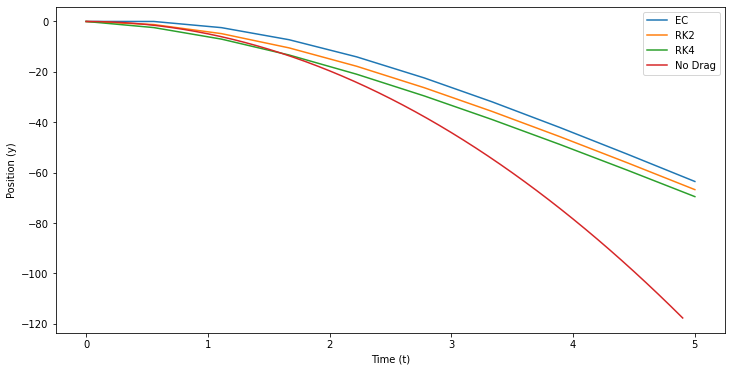

In [8]:
## Setup time

t0 = 0
tf = 5
N = 10
deltat = (tf-t0)/N

## Setup parameters (feel free to adjust)
m = 1
g = 9.8
beta = 0.01
alpha = 0.02

## Create arrays for the anaylsis
y_arr_EC = np.zeros(N)
vy_arr_EC = np.zeros(N)
y_arr_RK2 = np.zeros(N)
vy_arr_RK2 = np.zeros(N)
y_arr_RK4 = np.zeros(N)
vy_arr_RK4 = np.zeros(N)

## Run our code
t_arr_EC, y_arr_EC, vy_arr_EC = EC(y_arr_EC, vy_arr_EC, deltat, m, g, alpha, beta, t0)
t_arr_RK2, y_arr_RK2, vy_arr_RK2 = RK2(y_arr_RK2, vy_arr_RK2, deltat, m, g, alpha, beta, t0)
t_arr_RK4, y_arr_RK4, vy_arr_RK4 = RK4(y_arr_RK4, vy_arr_RK4, deltat, m, g, alpha, beta, t0)


## Plot figures
fig = plt.figure(figsize=(12,6))

plt.plot(t_arr_EC,y_arr_EC)
plt.plot(t_arr_RK2,y_arr_RK2)
plt.plot(t_arr_RK4,y_arr_RK4)

t = np.arange(0,5,0.1)
plt.plot(t, -0.5*g*t**2)

plt.xlabel('Time (t)')
plt.ylabel('Position (y)')
plt.legend(['EC','RK2','RK4', 'No Drag'])


## The Large Angle Pendulum

Now let's apply this to the Large Angle Pendulum! We start by making an SHO function that you modify.

In [9]:
def DeriveSHOModel1D(x, vx, g, l):
    '''SHO returns the value of the
    position and velocity changes at a given point in 
    phase space for a 1d SHO model.
    
    Returns dx_dt and dvx_dt in that order'''
    
    ## Compute the changes; the notation is derviative of thing
    ## underscore with respect to variable, so dvy_dt means
    ## derivative of vy with respect to t
    
    dvx_dt = -g/l*x
    dx_dt = vx
    
    ## Returns position change/dt then velocity change/dt
    return dx_dt, dvx_dt

### Preparing our functions

Now we call our code again with the SHO as the main model. Later we will learn how to pass this information to a big function without having to rewrite it. Maybe you arady know how? You can quickly skim these codes...They are the same as before but the SHO function is now called.

In [10]:
def EC_SHO(y_arr, vy_arr, deltat, g, l, tstart=0):
    '''EC performs an Euler Cromer integration for the model
    placed in the main loop. There are several checks in place
    to make sure that EC has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0+tstart, N*deltat+tstart, N)
        
        
        ## The core of the EC algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## ONLY THING CHANGED!!!!!
            dy_dt, dvy_dt = DeriveSHOModel1D(y_arr[i], vy_arr[i], g, l)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+dy_dt*deltat, vy_arr[i]+dvy_dt*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')

def RK2_SHO(y_arr, vy_arr, deltat, g, l, tstart=0):
    '''RK2 performs an 2nd order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK2 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0+tstart, N*deltat+tstart, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's two steps now
            k1_y, k1_vy = DeriveSHOModel1D(y_arr[i], vy_arr[i], g, l,)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveSHOModel1D(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, g, l)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+k2_y*deltat, vy_arr[i]+k2_vy*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
        
def RK4_SHO(y_arr, vy_arr, deltat, g, l, tstart=0):
    '''RK4 performs an 4th order Runge Kutta integration for the model
    placed in the main loop. There are several checks in place
    to make sure that RK4 has what it needs before running.
    Think about these kinds fo checks when doing your work.'''
    
    ## Make sure the arrays are clean and zeroed out to start 
    ## but we preserve any initial conditions that were set

    y0 = y_arr[0]
    vy0 = vy_arr[0]
    
    y_arr = np.zeros(len(y_arr))
    vy_arr = np.zeros(len(vy_arr))
    
    y_arr[0] = y0
    vy_arr[0] = vy0
    
    ## Another check: Make sure the arrays are the same size; else stop and raise error

    if len(y_arr) == len(vy_arr):
        
        ## Let's store the length of everything now that we know everything is the same length
        N = len(y_arr)
        
        ## We create the time array now and return it, there's no need to worry about that before now
        t_arr = np.linspace(0+tstart, N*deltat+tstart, N)
        
        
        ## The core of the RK algorithm
        ## For each point starting with the first and going to the last
        ## calculate the changes to the location and velocity 
        ## Add those changes to the original value and
        ## store that in the very next position in the arrays
        ## REPEAT UNTIL DONE
        
        for i in np.arange(0,len(y_arr)-1):
            
            ## It's four steps now
            k1_y, k1_vy = DeriveSHOModel1D(y_arr[i], vy_arr[i], g, l)
            k1_y, k1_vy = k1_y*deltat, k1_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k2_y, k2_vy = DeriveSHOModel1D(y_arr[i]+0.5*k1_y, vy_arr[i]+0.5*k1_vy, g, l)
            k2_y, k2_vy = k2_y*deltat, k2_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k3_y, k3_vy = DeriveSHOModel1D(y_arr[i]+0.5*k2_y, vy_arr[i]+0.5*k2_vy, g, l)
            k3_y, k3_vy = k3_y*deltat, k3_vy*deltat   ## DONT FORGET THE DELTAT FOR THESE LIKE I DID FOR AN HOUR!!!!
            
            k4_y, k4_vy = DeriveSHOModel1D(y_arr[i]+k3_y, vy_arr[i]+k3_vy, g, l)
            
            y_arr[i+1], vy_arr[i+1] = y_arr[i]+k4_y*deltat, vy_arr[i]+k4_vy*deltat
         
        ## Give us all that information we worked so hard for   
        return t_arr, y_arr, vy_arr
        
    else:
        
        print('Error: arrays mismatch size')
    

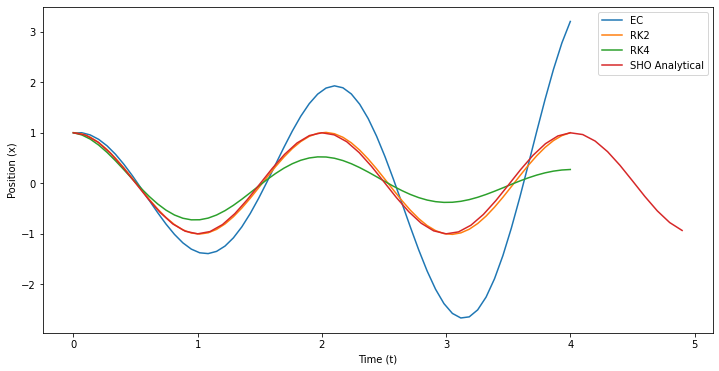

In [11]:
## Setup time

t0 = 0
tf = 4
N = 60
deltat = (tf-t0)/N

## Setup parameters (feel free to adjust)
g = 9.8
l = 1

## Create arrays for the anaylsis
x_arr_EC = np.zeros(N)
vx_arr_EC = np.zeros(N)
x_arr_RK2 = np.zeros(N)
vx_arr_RK2 = np.zeros(N)
x_arr_RK4 = np.zeros(N)
vx_arr_RK4 = np.zeros(N)

x0 = 1
vx0 = 0

x_arr_EC[0] = x0
x_arr_RK2[0] = x0
x_arr_RK4[0] = x0


## Run our code
t_arr_EC, x_arr_EC, vx_arr_EC = EC_SHO(x_arr_EC, vx_arr_EC, deltat, g, l, t0)
t_arr_RK2, x_arr_RK2, vx_arr_RK2 = RK2_SHO(x_arr_RK2, vx_arr_RK2, deltat,  g, l, t0)
t_arr_RK4, x_arr_RK4, vx_arr_RK4 = RK4_SHO(x_arr_RK4, vx_arr_RK4, deltat,  g, l, t0)


## Plot figures
fig = plt.figure(figsize=(12,6))

plt.plot(t_arr_EC,x_arr_EC)
plt.plot(t_arr_RK2,x_arr_RK2)
plt.plot(t_arr_RK4,x_arr_RK4)

t = np.arange(0,5,0.1)
plt.plot(t, x0*np.cos(np.sqrt(g/l)*t))

plt.xlabel('Time (t)')
plt.ylabel('Position (x)')
plt.legend(['EC','RK2','RK4', 'SHO Analytical'])

### Let's investigate

**&#9989; Do this** 

1. Compare the solutions as they exist. Do they make sense? What do you notice?
    - Which approach is modeling this behavior best?
2. Can you make adjustments to get them all more inline with each other? Can you ever fix EC?
3. What visualizations are useful in determining which of these approaches is working properly?
4. What kinds of comparisons and adjustments did you need to make to convince yourselves these models are working (or rather how well they work)

### The LAP

**&#9989; Do this** 

1. Modify the code to model the LAP and repeat the same investigations noticing what you find.
2. Make a plot of phase space (use old code) and plot your numerically determined trajectories in the space.